#### CitiBike 2022: Weekday vs Weekend Usage Patterns and Trip Volumes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import CitiBike 2022 dataset
trips = pd.read_csv(r"C:\Users\magia\OneDrive\Desktop\NY_Citi_Bike\2.Data\Prepared Data\nyc_2022_essential_data.csv")

In [3]:
trips.head()

,Unnamed: 0,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,started_at,ended_at,date,avgTemp
0,0,West End Ave & W 107 St,Mt Morris Park W & W 120 St,40.802116,-73.96818,40.804040,-73.94592,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,2022-01-21,-6.0
1,1,4 Ave & 3 St,Boerum Pl\t& Pacific St,40.673744,-73.98565,40.688488,-73.99116,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,2022-01-10,1.6
2,2,1 Ave & E 62 St,5 Ave & E 29 St,40.761227,-73.96094,40.745167,-73.98683,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,2022-01-26,-2.3
3,3,2 Ave & E 96 St,5 Ave & E 29 St,40.783962,-73.94717,40.745167,-73.98683,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2022-01-03,1.4
4,4,6 Ave & W 34 St,5 Ave & E 29 St,40.749640,-73.98805,40.745167,-73.98683,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,2022-01-22,-5.9


In [4]:
# ---  Parse datetime & keep only trips with a valid start ---

trips["started_at"] = pd.to_datetime(trips["started_at"], errors="coerce")
trips = trips.dropna(subset=["started_at"])

In [5]:
# ---  Time features & Weekend/Weekday label ---
trips["hour"] = trips["started_at"].dt.hour
trips["date"] = trips["started_at"].dt.date
weekend_days = {"Saturday", "Sunday"}
trips["period"] = trips["started_at"].dt.day_name().isin(weekend_days)\
    .map({True: "Weekend", False: "Weekday"})

In [6]:
# --- Average per calendar day (normalize 5 weekdays vs 2 weekend days) ---
overlay = (trips
           .groupby(["period", "date", "hour"])
           .size()
           .groupby(["period", "hour"])
           .mean()
           .reset_index(name="trips_per_day"))

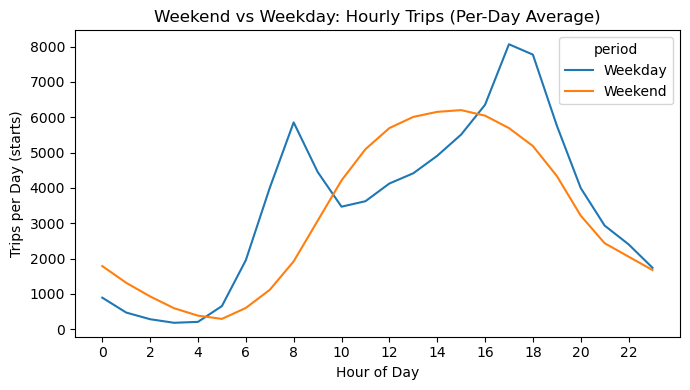

In [7]:
# --- Plot ---
plt.figure(figsize=(7, 4))
sns.lineplot(data=overlay, x="hour", y="trips_per_day", hue="period")
plt.title("Weekend vs Weekday: Hourly Trips (Per-Day Average)")
plt.xlabel("Hour of Day")
plt.ylabel("Trips per Day (starts)")
plt.xticks(range(0, 24, 2))
plt.tight_layout()
plt.savefig(r"C:\Users\magia\OneDrive\Desktop\NY_Citi_Bike\4.Visualizations\weekday_vs_weekend.png",
            dpi=300, bbox_inches="tight")

plt.show()

We aggregated trips by day of week and hour, then normalized to show the average per calendar day, grouped into weekdays vs weekends. The chart confirms ***two distinct usage patterns: weekdays show sharp peaks in the morning and evening rush hours, while weekends follow a smoother, bell-shaped curve across the daytime hours***. The y-axis shows plain trip counts, and although the shapes differ, totals look broadly similar between the two groups. To confirm that impression, we compare overall trip volumes in the bar chart.

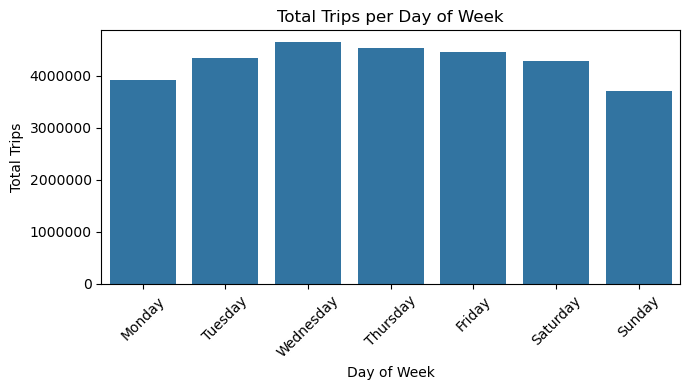

In [8]:
# --- Aggregate trips by day of week ---
dow_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
dow_counts = (trips.groupby(trips["started_at"].dt.day_name())
                   .size()
                   .reindex(dow_order)
                   .reset_index(name="trips"))

# --- Plot ---
plt.figure(figsize=(7,4))
sns.barplot(data=dow_counts, x="started_at", y="trips", order=dow_order)
plt.title("Total Trips per Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Trips")
plt.xticks(rotation=45)

# force y-axis to show plain numbers
plt.ticklabel_format(style="plain", axis="y")

plt.tight_layout()
plt.savefig(r"C:\Users\magia\OneDrive\Desktop\NY_Citi_Bike\4.Visualizations\total_trips_dow.png",
            dpi=300, bbox_inches="tight")

plt.show()

The bar chart confirms that ***total trip volumes are of a comparable order of magnitude across all days. Still, some considerable variation exists*** (the ticks on our y-axis go from 0 to 4 million): Wednesday and Thursday lead with the highest totals, while Sunday is clearly the lowest. Saturday stands out as the busiest weekend day, almost at weekday levels, whereas Monday sits closer to the lower end of the weekday range.